In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
pd.options.display.float_format = '{:,.6f}'.format
np.set_printoptions(precision=15,suppress=True)

In [22]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('../data/housing.data', header=None, names=columns, sep='\s+')

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222.000000,18.700000,396.900000,5.330000,36.200000


In [24]:
# Feature Normalization
def normalize(x):
    max_val = max(x)
    min_val = min(x)
    avg = np.mean(x)
    normalized = [(i-avg)/(max_val - min_val) for i in x]
    return normalized

In [25]:
df = df.apply(normalize,axis=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.040544,0.066364,-0.323562,-0.069170,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.069170,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.069170,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.069170,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.069170,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715


In [26]:
# Create X0 column
Xd = df.drop(columns=['MEDV'])
Xd.insert(0, 'X0', 1)
Xd.head()

,X0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.040544,0.066364,-0.323562,-0.069170,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,1,-0.040308,-0.113636,-0.149075,-0.069170,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,1,-0.040308,-0.113636,-0.149075,-0.069170,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,1,-0.040251,-0.113636,-0.328328,-0.069170,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,1,-0.039839,-0.113636,-0.328328,-0.069170,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [27]:
Xd.iloc[0,:]

X0         1.000000
CRIM      -0.040544
ZN         0.066364
INDUS     -0.323562
CHAS      -0.069170
NOX       -0.034352
RM         0.055636
AGE       -0.034757
DIS        0.026822
RAD       -0.371713
TAX       -0.214193
PTRATIO   -0.335695
B          0.101432
LSTAT     -0.211729
Name: 0, dtype: float64

In [71]:
# numpy array format
X = Xd.values
m = len(Xd.index)
y = df.MEDV.to_numpy().reshape(m,1)
n = Xd.shape[1]
alpha = 0.0005
iterations = 100000
print('Sample Size : {}, Features : {}'.format(m,n))

Sample Size : 506, Features : 14


In [82]:
#Initialize Theta
theta = np.ones((n,1))

### Without Vectorization (Loop)

In [96]:
# Hypothesis Function
def hypothesis_l(X,theta):
    n = len(theta)
    m = len(X)
    h = np.zeros((m,1))
    for i in range(0,m):
        sm=0
        for j in range(0,n):
            sm += X[i,j] * theta[j,0]
        h[i,0]=sm 
    return h

#Cost Function
def cost_l(h,y):
    m = len(h)
    cost = 0
    for i in range(m):
        cost += (h[i] - y[i]) ** 2
    return cost / (2*m)

#Gradient Descent Function
def gradient_descent_l(X,h,y, alpha,theta):
    f = X.shape[1]
    new_thetas = np.zeros((f,1))
    for j in range(n):
        th = 0
        for i in range(m):
            th += (h[i,0] - y[i,0]) * X[i,j] 
        new_thetas[j,0] = theta[j,0] - (alpha * (1/m) * th)
#         new_thetas[j,0] = theta[j,0] - ((1/m) * th)
    return new_thetas

In [83]:
%%time
h = hypothesis_l(X,theta)
cost_l(h,y)

Wall time: 9 ms


array([1.399752908228425])

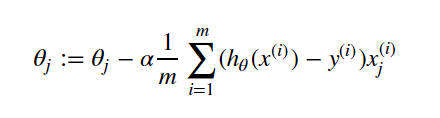

### With Vectorization

In [67]:
# Hypothesis Function
def hypothesis_v(X,theta):
    return X@theta

#Cost Function
def cost_v(h,y):
    return np.sum((h - y) ** 2) * (1/(2*m))

#Gradient Descent Function
def gradient_descent_v(X,h,y, alpha,theta):    
    f = X.shape[1]
    new_thetas = np.zeros((f,1))
    for j in range(n):
        th = 0
        for i in range(m):
            th += (h[i,0] - y[i,0]) * X[i,j] 
        new_thetas[j,0] = theta[j,0] - (alpha * (1/m) * th)
    return new_thetas

In [84]:

gradient_descent_l(X,h,y, alpha,theta)

array([[0.9995           ],
       [0.999960926898198],
       [1.000055214611307],
       [0.999868984882972],
       [0.999972477804582],
       [0.999880537287187],
       [1.000032271279119],
       [0.999869418280294],
       [1.000072683859053],
       [0.999784468065011],
       [0.999808482723599],
       [0.999917042437986],
       [1.00004960398653 ],
       [0.999908235951587]])

In [94]:
dev_list = []
for k in range(n):
    dev_sum = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j,0]*X[i,j]
        dev_i = (hypo_i - y[i,0])*X[i,k]
        dev_sum += dev_i
    dev_sum = (1/m)*dev_sum
    
    dev_list.append(dev_sum)
dev_list

[0.9999999999999983,
 0.07814620360307896,
 -0.11042922261438312,
 0.2620302340552935,
 0.05504439083525137,
 0.23892542562534522,
 -0.06454255823702781,
 0.2611634394125097,
 -0.1453677181065729,
 0.43106386997897883,
 0.38303455280215737,
 0.16591512402899722,
 -0.09920797306076043,
 0.18352809682583576]

In [100]:
%%time
initial_theta = theta
for i in range(m):
    th = np.zeros((n,1)) 
    err = h[i,0] - y[i,0]
    for k in range(n):       
        th[k,0] = initial_theta[k,0] - ((1/m) * np.sum(err * X[i,k]))
    initial_theta = th
initial_theta

Wall time: 69 ms


array([[0.000000000000002],
       [0.921853796396922],
       [1.110429222614383],
       [0.737969765944707],
       [0.94495560916475 ],
       [0.761074574374656],
       [1.064542558237027],
       [0.738836560587491],
       [1.145367718106573],
       [0.568936130021021],
       [0.616965447197844],
       [0.834084875971002],
       [1.099207973060762],
       [0.816471903174164]])